In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myntra-fashion-product-dataset/Fashion Dataset.csv
/kaggle/input/myntra-fashion-product-dataset/Images/Images/7981.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/12666.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/13288.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/6234.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/1269.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/3863.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/6241.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/10304.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/623.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/2193.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/14143.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/11925.jpg
/kaggle/input/myntra-fashion-product-dataset/Images/Images/3750.jpg
/kaggle/input/myntra-fashion-product-dataset/Im

# Fashion Recommentation System

Here I just try to creat a  recometation model in fashion industry from e- commerce platform . Here i am using mynthra kurthis data set

**Importing Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords
import string
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
fashion=pd.read_csv("/kaggle/input/myntra-fashion-product-dataset/Fashion Dataset.csv")
fashion.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


**Data Cleaning**

In [9]:
fashion.isnull().sum()

Unnamed: 0         0
p_id              18
name              18
price             18
colour            21
brand             18
img               18
ratingCount     7749
avg_rating      7749
description       18
p_attributes      18
dtype: int64

In [10]:
fashion.isna().sum()

Unnamed: 0         0
p_id              18
name              18
price             18
colour            21
brand             18
img               18
ratingCount     7749
avg_rating      7749
description       18
p_attributes      18
dtype: int64

So here some kind of null/na values in some columns excluding 'Image' column we need to clear na /null values so just drop from the column

In [11]:
fashion=fashion.dropna()

 na/null values are already droped, Image column is not necessary for further data exploretion stages so we need to drop that column also

,Unnamed: 0,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


**Data Exploretion**

In [16]:
print(fashion.shape)

(6581, 10)


Lets look the highest rated kurtha from this data set

In [17]:
rating=fashion.sort_values(by=['avg_rating'],ascending=False)
rating=rating.head(10)
print(rating[['brand','description','avg_rating']])

                   brand                                        description  \
2528             URBANIC  <ul><li>Coloured shade, no fade red jeans</li>...   
5314             Sangria  <b>ABOUT THE BRAND</b><br>Sangria is a ready-t...   
12892  Allen Solly Woman  Navy blue solid blazer has long sleeves, colla...   
360                Anouk  <ul> <li> Colour: black and white </li> <li> B...   
4987       Tokyo Talkies  Olive green solid a-line midi skirts, has a fr...   
5114           Hopscotch  <p>White and blue Embellished A-line knee leng...   
12736       Fort Collins  Black woven faux leather jacket, has a faux fu...   
12703         VERO AMORE  Maroon washed solid insulator parka  with faux...   
12692            JC Mode  Mustard yellow solid padded jacket, has a hood...   
12667              MANGO  Green solid quilted jacket, has a spread colla...   

       avg_rating  
2528          5.0  
5314          5.0  
12892         5.0  
360           5.0  
4987          5.0  
5114      

lets move on which is most user wantedbrands in kurtis

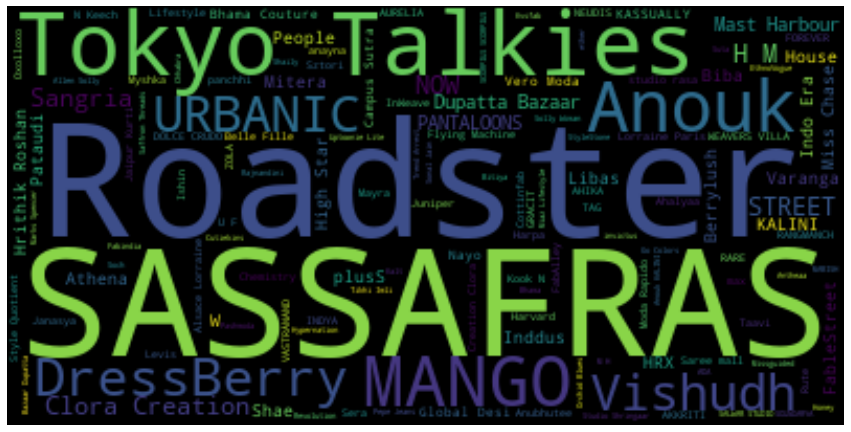

In [18]:
text=" ".join(i for i in fashion['brand'])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='black').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Here we got most popular brands are 'Anubhutee','MALHAAR,'Saanj','Anouk','Rain','Rainbow'

# Recommenting Fashion Products

Here normally using content based filtering stratergy ,  content measurment is practicaly not possibile  but here we  using somethig similar methode it is **weighted avg rating**

***Weighted avg rating**
score=(n/(n+m)*a) + (m/(m+n)*mr)

* mean rating(mr): mean rating of all products
* minimum rating(m): minimum no of rating
* number of rating(n): total no of rating of products
* average ratings(a): avg rating of products

In [20]:
mr=fashion['avg_rating'].mean()
m=fashion['ratingCount'].quantile(0.9)
n=fashion['ratingCount']
a=fashion['avg_rating']

fashion['Score']=(n/(n+m)* a) + (m/(m+n)* mr)

recomment=fashion.sort_values('Score',ascending=False)
print(recomment[['brand','description','avg_rating','Score','price']].head(10))

                brand                                        description  \
13194       SASSAFRAS  Burgundy ribbed open front longline shrug, has...   
991            Athena  Jazz up your collection of casual ensembles wi...   
993         SASSAFRAS  Black solid knitted crop top, has a high neck,...   
2970    Tokyo Talkies  Black solid mid-rise regular shorts, has 2 poc...   
7971            Libas  Black and red embroidered A-line kurti, has a ...   
10840  Dupatta Bazaar  White embroidered&nbsp;dupattaChiffon<br>Hand-...   
10844  Dupatta Bazaar  White solid dupatta and has a taping borderPol...   
75             anayna  <ul><li>Colour: blue and white</li><li>Geometr...   
12951       SASSAFRAS  Black ribbed open front longline shrug, has lo...   
2978              H&M  Cycling shorts in stretch cotton jersey with a...   

       avg_rating     Score   price  
13194    4.558199  4.519792  1799.0  
991      4.528175  4.516528  1299.0  
993      4.488146  4.481872   999.0  
2970     4.

**Summary**

*A fashion recommendation system is an application that recommends the most trending fashion based on the user’s search query.Myntra is one of the popular e-commerce platforms known for its fashion recommendations.*

Index(['Unnamed: 0', 'p_id', 'name', 'price', 'colour', 'brand', 'ratingCount',
       'avg_rating', 'description', 'p_attributes', 'Score'],
      dtype='object')
   Unnamed: 0        p_id                                               name  \
0           0  17048614.0  Khushal K Women Black Ethnic Motifs Printed Ku...   
1           1  16524740.0  InWeave Women Orange Solid Kurta with Palazzos...   
2           2  16331376.0  Anubhutee Women Navy Blue Ethnic Motifs Embroi...   
3           3  14709966.0  Nayo Women Red Floral Printed Kurta With Trous...   
4           4  11056154.0   AHIKA Women Black & Green Printed Straight Kurta   

    price     colour      brand  ratingCount  avg_rating  \
0  5099.0      Black  Khushal K       4522.0    4.418399   
1  5899.0     Orange    InWeave       1081.0    4.119334   
2  4899.0  Navy Blue  Anubhutee       1752.0    4.161530   
3  3699.0        Red       Nayo       4113.0    4.088986   
4  1350.0      Black      AHIKA      21274.0    3.97837

In [30]:
import pandas as pd
from IPython.display import display, Image

# Load the dataset
fashion_data = pd.read_csv("/kaggle/input/myntra-fashion-product-dataset/Fashion Dataset.csv")

# Ensure the 'img' column is included if it exists
if 'img' not in fashion_data.columns:
    print("The 'img' column is not present in the DataFrame.")
else:
    # Calculate the weighted score for recommendations
    mr = fashion_data['avg_rating'].mean()
    m = fashion_data['ratingCount'].quantile(0.9)
    n = fashion_data['ratingCount']
    a = fashion_data['avg_rating']

    fashion_data['Score'] = (n / (n + m) * a) + (m / (m + n) * mr)

    # Sort by score
    recommendations = fashion_data.sort_values('Score', ascending=False)

    # Display the top 10 recommendations
    top_recommendations = recommendations.head(10)

    # Display the top 10 recommendations with images
    for index, row in top_recommendations.iterrows():
        print(f"Brand: {row['brand']}")
        print(f"Description: {row['description']}")
        print(f"Average Rating: {row['avg_rating']}")
        print(f"Score: {row['Score']}")
        print(f"Price: {row['price']}")
        display(Image(url=row['img']))
        print("\n")


Brand: SASSAFRAS
Description: Burgundy ribbed open front longline shrug, has long sleeves, straight hem98% cotton, 2% spandex<br>Hand-washThe model (height 5'8'') is wearing a size S
Average Rating: 4.558198810535259
Score: 4.519791745927504
Price: 1799.0




Brand: Athena
Description: Jazz up your collection of casual ensembles with this stylish top. Flaunting power shoulders and a textured finish, it will lend you a structured and sharp look.&nbsp;<ul><li>Chic fuchsia pink tone</li><li>Smart-looking V-neck</li><li>Structured power shoulders</li><li>Polyester, machine wash</li></ul><b>Trend Alert</b><br>Sharp and structured, the signature retro power shoulders from the 80s ushered in encouragement towards power dressing. A symbol of empowerment and characterized by voluminous shoulders, they lend an authoritative look that maintains a feminine edge.Polyester<br>machine washThe model (height 5'8) is wearing a size S
Average Rating: 4.528174500129836
Score: 4.516527505308623
Price: 1299.0




Brand: SASSAFRAS
Description: Black solid knitted crop top, has a high neck, and long sleevesThe model (height 5'8") is wearing a size SMaterial: 96% cotton, 4% Lycra&nbsp;<br>Machine Wash
Average Rating: 4.488146113146113
Score: 4.481871730758285
Price: 999.0




Brand: Tokyo Talkies
Description: Black solid mid-rise regular shorts, has 2 pockets, and drawstring closureMaterial: 60% Cotton, 40% Polyster<br>Machine WashRegular Fit<br> The model (height 5'8") is wearing a size 28
Average Rating: 4.530711206896552
Score: 4.466879440619508
Price: 699.0




Brand: Libas
Description: Black and red embroidered A-line kurti, has a mandarin collar, button closure, three-quarter sleeves, curved hemRayon&nbsp;<br>Hand-washThe model (height 5'8) is wearing a size S
Average Rating: 4.496608253250424
Score: 4.463437902783669
Price: 1499.0




Brand: Dupatta Bazaar
Description: White embroidered&nbsp;dupattaChiffon<br>Hand-wash coldLength: 2.5 metres Width: 1 metre
Average Rating: 4.54882664647994
Score: 4.460666979058071
Price: 899.0




Brand: Dupatta Bazaar
Description: White solid dupatta and has a taping borderPoly Chiffon<br>Hand-washLength:&nbsp;2.35 m<br>Width: 90 cm
Average Rating: 4.53625081645983
Score: 4.460268021860122
Price: 599.0




Brand: anayna
Description: <ul><li>Colour: blue and white</li><li>Geometric screen printed with striped detail</li><li>Shoulder straps</li><li>Straight shape with regular style</li><li>Knee length with straight hem</li><li>Machine weave regular cotton</li><li>Side slits</li></ul>Cotton kantha<br>Machine washThe model (height 5'8") is wearing a size S
Average Rating: 4.571573604060914
Score: 4.455154454202083
Price: 1660.0




Brand: SASSAFRAS
Description: Black ribbed open front longline shrug, has long sleeves, straight hemThe model (height 5'8'') is wearing a size S98% cotton, 2% spandex<br>Hand-wash
Average Rating: 4.478017048003589
Score: 4.452487908939884
Price: 1799.0




Brand: H&M
Description: Cycling shorts in stretch cotton jersey with an elasticated waist95% Cotton, 5% Elastane<br>Machine wash
Average Rating: 4.559338521400778
Score: 4.449554127626129
Price: 699.0
